###### Problem Set 1, due January 10th at 5:30pm 


### Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download IMT574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [1]:
# #IPython is what you are using now to run the notebook
# import IPython
# print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

Numpy version:        1.15.4 (need at least 1.7.1)
SciPy version:         1.1.0 (need at least 0.12.0)
Pandas version:       0.23.4 (need at least 0.11.0)
Mapltolib version:     2.2.3 (need at least 1.2.1)
Scikit-Learn version: 0.19.2 (need at least 0.13.1)


## About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

## Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.
Selected questions ask you to answer in multiple ways. Make sure to provide different functions or ways for answering the same question. This will help you see that most data questions can be answered in different ways even with the same software language.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flights= pd.read_csv('flights/flights.csv') #read in the dataframe

In [4]:
print (flights.shape) # matrix dimensions
print (flights.columns) # colnames
print (flights.dtypes) #data types

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
# what  are all the possible destinations? (just need the unique!)
destinations = flights.dest.unique()
print(destinations)

#take a look at the dataframe
flights.head(10)


['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:
# Your code here
to_SEA = flights[flights.dest=="SEA"]

len(to_SEA) # there were 3923 flights to the SEA destination out of NYC airports 
# (all the origins are some airport in NYC so we don't need to specify)
# we can also look at shape and look at the number of columns, which is also 3923
to_SEA.shape

(3923, 17)

**Answer 1a: 3923 flights from *any* NYC airport to Seattle in 2013**

(b) How many airlines fly from NYC to Seattle?

In [7]:
# airlines is stored under "carrier"
airlines_to_SEA = to_SEA.carrier.unique()

print(airlines_to_SEA)
len(airlines_to_SEA)

['AS' 'DL' 'UA' 'B6' 'AA']


5

**Answer 1b: 5**

(c) How many unique air planes fly from NYC to Seattle?

In [8]:
# Airplanes are the "tailnum" so let's look at the unique ones
airplanes_to_SEA = to_SEA.tailnum.unique()
print(airplanes_to_SEA)
len(airplanes_to_SEA)



['N594AS' 'N3760C' 'N45440' 'N37464' 'N503JB' 'N77296' 'N553AS' 'N3ETAA'
 'N3772H' 'N76523' 'N592AS' 'N3768' 'N37434' 'N712JB' 'N78285' 'N3745B'
 'N552AS' 'N717TW' 'N3BAAA' 'N73275' 'N37263' 'N533AS' 'N679DA' 'N430UA'
 'N607JB' 'N496UA' 'N3HPAA' 'N3765' 'N579AS' 'N713TW' 'N445UA' 'N591JB'
 'N478UA' 'N3AUAA' 'N3734B' 'N546AS' 'N175DN' 'N574UA' 'N599JB' 'N33714'
 'N558AS' 'N3ANAA' 'N3759' 'N568AS' 'N624AG' 'N438UA' 'N519JB' 'N551AS'
 'N3HNAA' 'N78448' 'N3771K' 'N537AS' 'N727TW' 'N433UA' 'N663JB' 'N402UA'
 'N408AS' 'N3764D' 'N3JLAA' 'N76519' 'N794JB' 'N17229' 'N3BKAA' 'N407AS'
 'N563AS' 'N18243' 'N709JB' 'N403AS' 'N3BDAA' 'N3762Y' 'N16217' 'N513AS'
 'N706TW' 'N632JB' 'N466UA' 'N402AS' 'N3753' 'N3ECAA' 'N508AS' 'N712TW'
 'N465UA' 'N504JB' 'N417UA' 'N320AS' 'N3GJAA' 'N3757D' 'N67171' 'N827UA'
 'N597JB' 'N33284' 'N565AS' 'N3GCAA' 'N639DL' 'N820UA' 'N579JB' 'N531AS'
 'N435UA' 'N510JB' 'N481UA' 'N3754A' 'N3HAAA' 'N596AS' 'N718TW' 'N36280'
 'N651JB' 'N12238' 'N3JHAA' 'N3756' 'N589AS' 'N33203' '

936

**Answer 1c: 936**

(d) What is the average arrival delay for flights from NC to Seattle?

In [9]:
# arrival delay = 'arr_delay' and it can be positive or negative, because sometimes the plane shows up early!
to_SEA['arr_delay'].mean()
# turns out the mean isn't really too informative probably, because it basically comes out as "not really delayed at all"

-1.0990990990990992

**Answer 1d: -1.099 minutes... so all those delayed arrival times you've ever experienced are just fake (just kidding)**


(e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [10]:
# 1 
# the kind of messy way to do this is with different partitioning and kind of manually reporting
# so let's grab the different airlines...
to_SEA.head(10) # we can actually see that there's only two airline origins

print(to_SEA.origin.unique()) # it's only EWR and JFK
jfk = len(to_SEA[to_SEA.origin=="JFK"])/len(to_SEA)
print(jfk)
ewr = len(to_SEA[to_SEA.origin=="EWR"])/len(to_SEA)
print(ewr)

#SANITY CHECK (passed)
assert(jfk+ewr==1)

# 2
# definitely a way to do this with some pandas manipulation that isn't lame
#group by the NYC airports
# summarise it by taking the count out of the total count
to_SEA=to_SEA.fillna("NA") #fill in the NAs because otherwise the counts are off
total = len(to_SEA)
props = to_SEA.groupby(to_SEA.origin).count()/total
# we come up with the same answer which is:
#EWR: .4667
#JFK: .5333




['EWR' 'JFK']
0.5332653581442773
0.46673464185572267


**Answer 1e: EWR: .4667    JFK: .5333**

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [11]:
# I assume we are no longer working with just SEATTLE and have moved back to looking at the whole dataset

# Here is the absolute maximum, but we care about largest AVERAGE
flights[flights.dep_delay==flights.dep_delay.max()]
# looks like it's January 9th, 2013
flights2=flights[(flights.dep_delay>=0) & (flights.arr_delay>=0)]
split_date=pd.DataFrame(flights2.groupby(by=["year","month","day"],as_index=False)['dep_delay','arr_delay'].mean())

split_date=pd.DataFrame(split_date.assign(total= lambda split_date: split_date.dep_delay+split_date.arr_delay))

print(split_date[split_date.dep_delay==max(split_date.dep_delay)])
print(split_date[split_date.arr_delay==max(split_date.arr_delay)])


     year  month  day   dep_delay   arr_delay       total
244  2013      9    2  113.336609  109.776413  223.113022
     year  month  day   dep_delay   arr_delay       total
254  2013      9   12  105.930108  122.870968  228.801075


**Answer 2a: Largest Average Departure Delay: September 2, 2013**

**Answer 2a: Largest Average Arrival Delay: September 12, 2013**

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [12]:
print(split_date[split_date.total==max(split_date.total)])
# this question is so confusing! But I'm assuming it means taking both arrival delays and departure delays into account and looking at the total

     year  month  day   dep_delay   arr_delay       total
254  2013      9   12  105.930108  122.870968  228.801075


**Answer 2b: Assuming that this question is looking for the day with the highest *total* average arrival and departure delays... then it's September 12th, 2013**

(c) Are there any seasonal patterns in departure delays for flights from NYC?

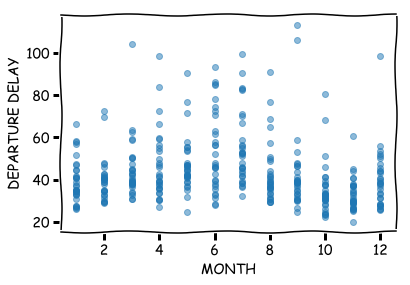

In [13]:
with plt.xkcd():
    plt.scatter(split_date.month, split_date.dep_delay, alpha=0.5)
    plt.xlabel("MONTH")
    plt.ylabel("DEPARTURE DELAY")
    plt.show()

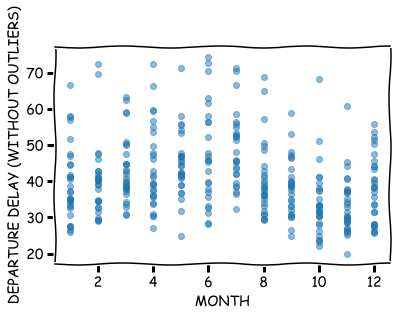

In [14]:
# we can look at a plot of Month by departure delay points (if we take the individual points it's gonna look like weird towers...)



#We can also look after we remove outliers
#removing outliers
mean = np.mean(split_date.dep_delay, axis=0)
sd = np.std(split_date.dep_delay, axis=0)

final_list = [x for x in split_date.dep_delay if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
split_date = split_date[split_date.dep_delay.isin(final_list)]

with plt.xkcd():
    plt.scatter(split_date.month, split_date.dep_delay,alpha=0.5)
    plt.xlabel("MONTH")
    plt.ylabel("DEPARTURE DELAY (WITHOUT OUTLIERS)")
    plt.show()

#it does look slightly guassian distributed?
# seems like flights leave later in the middle of the year (Summer)





**Answer 2c: Judging by visuals alone, it does look like during the Summer (May to August), the departing flights are more delayed.**

(d) On average, how do departure delays vary over the course of a day?

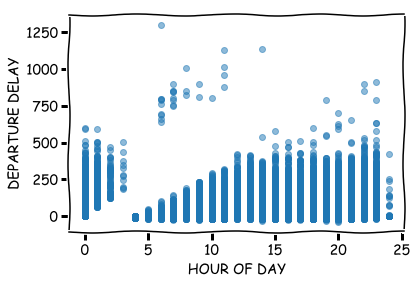

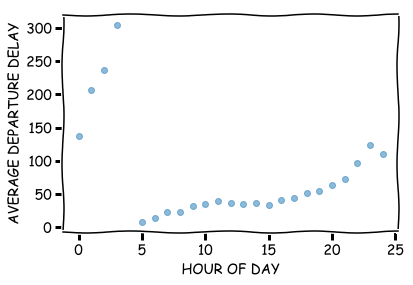

In [15]:
# Now we want to look at flights again (not averaged), so that we can see all the flights for one day
# we don't care about the months anymore, we care about the time

#here is before we do any averages

with plt.xkcd():
    plt.scatter(flights.hour, flights.dep_delay,alpha=0.5)
    plt.xlabel("HOUR OF DAY")
    plt.ylabel("DEPARTURE DELAY")
    plt.show()

    
    #here are the averages per hour
    by_day = pd.DataFrame(flights2.groupby(by=["hour"],as_index=False)['dep_delay','arr_delay'].mean())
    plt.scatter(by_day.hour, by_day.dep_delay,alpha=0.5)
    plt.xlabel("HOUR OF DAY")
    plt.ylabel("AVERAGE DEPARTURE DELAY")
    plt.show()


#from scipy import optimize
#params, params_covar = optimize.curve_fit

**Answer 2d: So, it looks like departures are pretty on time once morning starts (5am), and get worse over the course of the day. In the middle of the night (or rather, from midnight to 4am which is technically the early early morning), delays are at their worst!**

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [16]:
#so here we care about rate, not just timing
#let's make a column for rate and then take the max

flights=pd.DataFrame(flights.assign(rate= lambda flights: flights.distance/flights.air_time))
flights.head(10)

flights[flights.rate==max(flights.rate)]

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,rate
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,11.723077


**Answer 3: Flight number 1499 on May 25th flew the fastest, at 11.72 miles (km?) per minute.**

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [17]:
#there's a few ways to do this. the first way I can think of is to get the number of days (presumably 365) and make a table of how many times certain flights occur, and see if any occur AT LEAST 365 times...
counts = pd.DataFrame(flights.groupby(by=['carrier','flight','dest'],as_index=False).count())

#{ k:v for k, v in counts.items() if v>=365 }
counts = counts.sort_values(by=['year'],ascending=False)

counts = counts[counts.month>=365] # big prolem here, I'm choosing month but what if month has missing data?

print(counts.iloc[:, : 3])
print('\n' + str(len(counts)) + ' flights')

      carrier  flight dest
914        AA    1611  MIA
1243       B6     703  SJU
904        AA    1357  SJU
10613      VX     413  LAX
1118       B6     219  CLT
5116       UA      15  HNL
1147       B6     359  BUR
1150       B6     371  FLL
1169       B6     431  SRQ
783        AA     181  LAX
2012       DL    2159  MCO
775        AA     119  LAX
10609      VX     407  LAX
4631       EV    5712  IAD
10607      VX     251  LAS
767        AA      59  SFO
1379       B6    1783  MCO
2081       DL    2391  TPA

18 flights


**Answer 4: My table above should show the 18 flights that happen every day.**

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


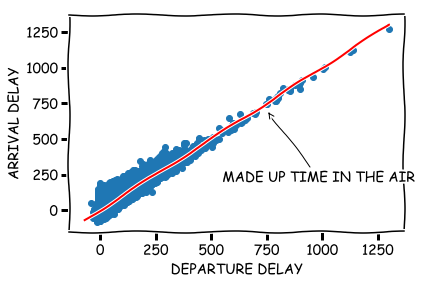

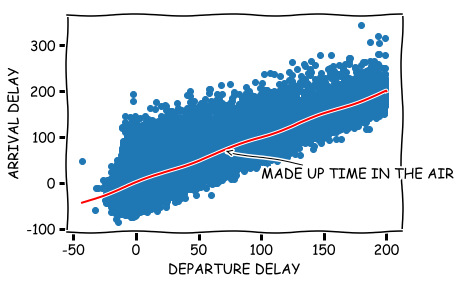

In [18]:

# I'm always curious about how flights "make up" the in-flight time when they've departed later than expected. 
# Somehow I tend to always arrive at the right time despite the long delay. Is that just my experience?
with plt.xkcd():
    plt.scatter(flights.dep_delay,flights.arr_delay)
    x = np.linspace(-70, max(flights.dep_delay), 1000)
    plt.plot(x, x, color='red');
    plt.xlabel("DEPARTURE DELAY")
    plt.ylabel("ARRIVAL DELAY")
    plt.annotate(
            'MADE UP TIME IN THE AIR',
            xy=(750,700), arrowprops=dict(arrowstyle='->'), xytext=(550, 200))
    plt.show()

    #just taking a closer look
    plt.scatter(flights.dep_delay[flights.dep_delay<200],flights.arr_delay[flights.dep_delay<200])
    x = np.linspace(min(flights.dep_delay), 200, 1000)
    plt.plot(x, x, color='red');
    plt.xlabel("DEPARTURE DELAY")
    plt.ylabel("ARRIVAL DELAY")
    
    plt.annotate(
            'MADE UP TIME IN THE AIR',
            xy=(70,70), arrowprops=dict(arrowstyle='->'), xytext=(100, 10))
    
    plt.show()
# OK so definitely correlated, I'd be shocked if it wasn't.
# But it's not exactly 1:1. What time are they "making up"?
# What we care about is below that red line.
# so we want to know the proportion of points that fall below the y=x line, and on average how much time you can "make up in the air"



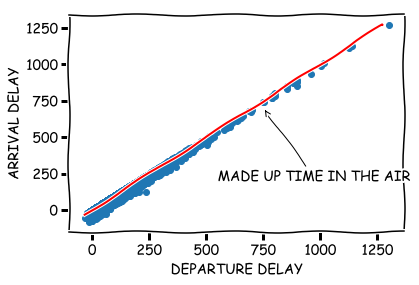

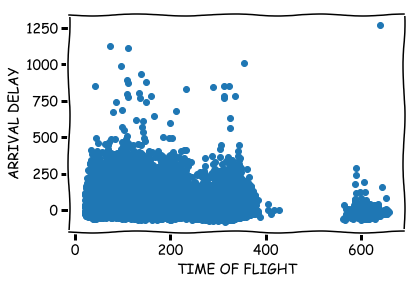

In [19]:
# we care about these guys, where the departing delay is less than the arrival delay, meaning they made up some time.
make_ups = flights[flights.dep_delay>flights.arr_delay]
with plt.xkcd():
    plt.scatter(make_ups.dep_delay,make_ups.arr_delay)
    x = np.linspace(min(make_ups.dep_delay), max(make_ups.arr_delay), 1000)
    plt.plot(x, x, color='red');
    plt.xlabel("DEPARTURE DELAY")
    plt.ylabel("ARRIVAL DELAY")
    plt.annotate(
        'MADE UP TIME IN THE AIR',
        xy=(750,700), arrowprops=dict(arrowstyle='->'), xytext=(550, 200))
    plt.show()

    #so let's plot how the flights that "make up" air time are affected by length of the flight.
    plt.scatter(make_ups.air_time,make_ups.arr_delay)
    plt.xlabel("TIME OF FLIGHT")
    plt.ylabel("ARRIVAL DELAY")
    plt.show()
# what the actual heck is going on with this plot
# it looks ever so slightly negative. So what I predicted might be somewhat true. Like the arrival delay "make up" time actually helped the flights arrive more on  time for longer flights


In [20]:
earlys = len(make_ups)
lates = len(flights[flights.dep_delay<=flights.arr_delay])

print(earlys, lates, len(flights))
print(earlys/len(flights))
print(lates/len(flights))

221565 105781 336776
0.6579002066655582
0.3140989856759389


**I've always been curious about how flights "make up the time" in the air. I'm sitting there, after waiting 40 minutes or whatever, knowing I'll be late on the other end (my destination). But sometimes, the plane can "make up" that time, and I arrive only 3 minutes late, or not late at all. I've always been confused by that, because if planes can go faster why don't they just go faster? I've especially noticed that on longer flights, they can "make up" even more of that time.**

**So I want to know, what proportion of delayed flights actually make up any air time? And does that change with length of the flight?**

About 66% of flights actually make up some air time, meaning that the departing delay was *longer* than the arrival delay.
Without doing actual parameter fitting, it's possible that there is a slight negative trend, meaning that for flights that made up time in the air, they have even shorter arrival delays if the flight was longer.


## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

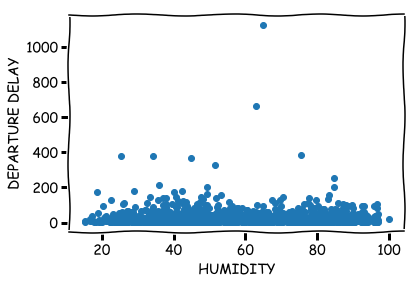

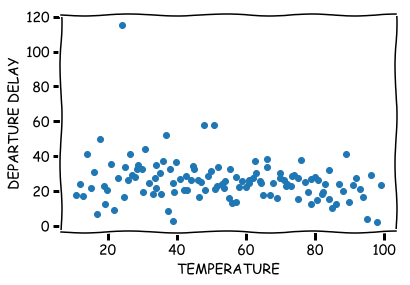

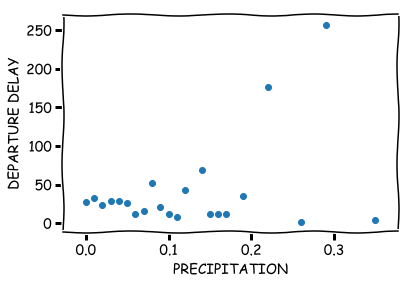

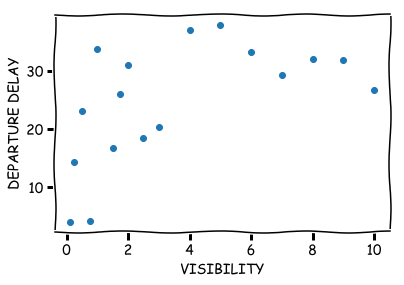

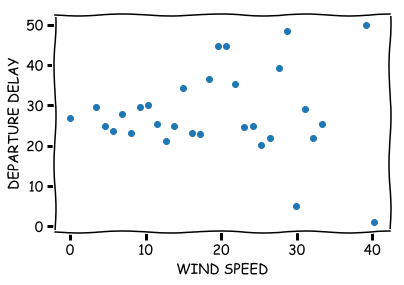

In [21]:
#load the weather set
weather = pd.read_csv('weather.csv')
weather.head(10)

#ok so this dataset is looking at flights out of NYC in 2013 and the weather conditions. So maybe one of these weather predictors can actually say something about how delayed a flight will be!
#we have to line up the data frames for the same day!

joined = flights.join(weather, lsuffix='_month', rsuffix='_day')
joined = joined[joined.dep_delay>0] #only include real delays
humid_means = pd.DataFrame(joined.groupby(by=["humid"],as_index=False)['dep_delay'].mean())
vis_means = pd.DataFrame(joined.groupby(by=["visib"],as_index=False)['dep_delay'].mean())
temp_means = pd.DataFrame(joined.groupby(by=["temp"],as_index=False)['dep_delay'].mean())
prec_means = pd.DataFrame(joined.groupby(by=["precip"],as_index=False)['dep_delay'].mean())
ws_means = pd.DataFrame(joined.groupby(by=["wind_speed"],as_index=False)['dep_delay'].mean())


with plt.xkcd():
    #humidity
    plt.scatter(humid_means.humid,humid_means.dep_delay)
    plt.xlabel('HUMIDITY')
    plt.ylabel('DEPARTURE DELAY')
    plt.show()
    
    plt.scatter(temp_means.temp,temp_means.dep_delay)
    plt.xlabel('TEMPERATURE')
    plt.ylabel('DEPARTURE DELAY')
    plt.show()
    
    plt.scatter(prec_means.precip,prec_means.dep_delay)
    plt.xlabel('PRECIPITATION')
    plt.ylabel('DEPARTURE DELAY')
    plt.show()

    
    #visibility
    plt.scatter(vis_means.visib,vis_means.dep_delay)
    plt.xlabel('VISIBILITY')
    plt.ylabel('DEPARTURE DELAY')
    plt.show()
    # when visibility is worse, departure delays are longer!
    
    
    # weirdly, it looks like when there are extreme temperatures, the delays are less long. But I think that's just an artifact of the fact that extreme temps are more rare.
    # we see longer delays in the mid-range temps simply because we have more of mid-range temp days I think.
    plt.scatter(ws_means.wind_speed,ws_means.dep_delay)
    plt.xlabel('WIND SPEED')
    plt.ylabel('DEPARTURE DELAY')
    plt.show()


**Answer 6:**

We can intuitively describe situations where weather would affect the departure delay of our flight. I know I've flown out of places experiencing snow and they're totally unprepared for ice! You can also imagine that something as important as "visibility" would affect whether you're going to safely fly the plane!

So here I've shown a few plots (their averages! as to not overwhelm our eyes with too many overlapping data points). We can see that:

* except for a few outliers, humidity seems to not have a clear trend. I also think there are more "outlier" points in the mid-humidity range because we simply have more mid-humidity days, as opposed to extreme humidity values. But it is interesting that the delays are happening when it's a mid-humidity day. But I'm guessing it's due to something else that I'm not accounting for.

* looking on average there's not really an effect of temperature either

* there is a clear effect of precipitation amount. More precipitation = longer departure delay

* clear effect of visibility as well, but with a plateau at around visibility 4. Anything worse than that seems to be the same amount of delayed. But certainly less delay before that threshold.

* and finally, there seems to be a slight positive trend for how wind speed affects delays. Faster wind = longer delay (most of the time)